# Taryn Nicole Michael
# 201800323
# NMAL841 Practical Assignment 2
# 05/05/2021
# Polynomial Regression in Python

Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

Polynomial Regression is generally used when a non-linear relationship between dependant and independant variables is present.

Since most real-world data will be non-linear, it is important to familiarise yourself with the concept of polynomial regression and how to use it.

To aid in doing this, a class for polynomial regression has been created below whereby the user may specify the degree of the polynomial. 
It also allows the option to regularize the model with L2 (Ridge) regularization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
class PolynomialReg() :

    
    def __init__(self, degree, x, y):
        self.degree = degree
        self.x = x
        self.y = y
    def fit(self): 
        global X_trans
        global V
        global P
        X_trans = np.vander(self.x, self.degree+1 ,increasing=True) #add features to transform input data based on degree provided by user
        self.θ = np.linalg.inv(X_trans.T @ X_trans) @X_trans.T @ self.y #normal equation
        V = (1/X_trans.shape[0])*(self.y-X_trans.dot(self.θ)).T.dot(self.y-X_trans.dot(self.θ)) #variance
        P = np.poly1d(np.flip(self.θ)) #creates a polynomial model using parameters given by normal equation
        print('Parameters for model are {}'.format(self.θ))
        print('Polynomial equation for model is: {}'.format(P))
    
    
    def fit_ridge(self, λ):
        global reg_V
        global reg_P
        #X_trans = np.vander(self.x, self.degree+1 ,increasing=True)
        self.θ_ridge = np.linalg.inv(X_trans.T @ X_trans + λ*np.identity(self.degree+1)) @ X_trans.T @ y
        reg_V = (1/X_trans.shape[0])*(self.y-X_trans.dot(self.θ_ridge)).T.dot(self.y-X_trans.dot(self.θ_ridge))
        reg_P = np.poly1d(np.flip(self.θ_ridge))
        print('Parameters for regularized model are {}'.format(self.θ_ridge))
        print('Polynomial equation for regularized model is: {}'.format(reg_P))
    
    def predict(self):
        self.Y_pred = X_trans @ self.θ
        return self.Y_pred
    
    def predict_ridge(self):
        self.Y_pred_rid = X_trans @ self.θ_ridge
        return self.Y_pred_rid
    
    def plot(self):
        plt.scatter(self.x, self.y, color='green', label = 'data')
        plt.plot(self.x, P(self.x), color='red', label = 'fitted line' )
        plt.plot(x, y+1*np.sqrt(V), 'b', label= 'y+1sd')
        plt.plot(x,y-1*np.sqrt(V),'k', label= 'y-1sd')
        plt.title('Fitting Polynomial Regression')
        plt.ylabel('y values')
        plt.xlabel('x values')
        plt.legend()
        plt.show()
        
    def plot_ridge(self):
        
        plt.scatter(self.x, self.y, color='green', label = 'data')
        plt.plot(self.x, reg_P(self.x), color = 'red', label = 'fitted regularized line')
        plt.plot(x, y+1*np.sqrt(reg_V), 'b', label= 'y+1sd')
        plt.plot(x,y-1*np.sqrt(reg_V),'k', label= 'y-1sd')
        plt.title('Fitting Polynomial Regression with Ridge Regularization')
        plt.ylabel('y values')
        plt.xlabel('x values')
        plt.legend()
        plt.show()   
        

In [52]:
x_0 = np.arange(0, 10, 0.1)
x = x_0 + np.random.normal(0, 0.2, x_0.shape)
y_0 = np.sin(x)
y = y_0 + np.random.normal(0,0.3, x.shape)
degree = 5
model = PolynomialReg(degree = degree, x=x, y=y)

In [53]:
model.fit()

Parameters for model are [ 2.87718253e-02  1.86992196e+00 -1.11478389e+00  1.89596366e-01
 -9.19298096e-03 -6.46000858e-05]
Polynomial equation for model is:            5            4          3         2
-6.46e-05 x - 0.009193 x + 0.1896 x - 1.115 x + 1.87 x + 0.02877


In [54]:
model.fit_ridge(0.5)

Parameters for regularized model are [ 1.98294465e-01  1.31036238e+00 -7.32583620e-01  9.06804766e-02
  1.67113486e-03 -4.91634948e-04]
Polynomial equation for regularized model is:             5            4           3          2
-0.0004916 x + 0.001671 x + 0.09068 x - 0.7326 x + 1.31 x + 0.1983


In [55]:
model.predict()

array([-0.89166783, -0.05293416,  0.5795436 ,  0.18409977,  0.7700728 ,
        0.46832147,  0.92127478,  0.96440181,  0.94922203,  0.84268564,
        0.88734579,  0.97700603,  0.96283636,  0.96863152,  0.85233147,
        0.94734745,  0.88360006,  0.69287201,  0.9369275 ,  0.70145872,
        0.72577955,  0.75932196,  0.74684167,  0.30745729,  0.6250391 ,
        0.52758094,  0.28131925,  0.35091564,  0.11949277, -0.06621627,
        0.095832  , -0.05811877, -0.05627802, -0.3211333 , -0.4298933 ,
       -0.4308986 , -0.41619871, -0.54470859, -0.53229523, -0.61427724,
       -0.64747742, -0.6717866 , -0.74624154, -0.71256058, -0.74741323,
       -0.74942671, -0.75807959, -0.75727601, -0.66303904, -0.73297398,
       -0.75692119, -0.73195502, -0.74499216, -0.62008601, -0.64466307,
       -0.41167205, -0.54369811, -0.60961137, -0.38306166, -0.39413284,
       -0.50780434, -0.29887252, -0.00873197, -0.08540803, -0.25351644,
       -0.179817  ,  0.08415494,  0.17111107,  0.14738176,  0.23

In [56]:
model.predict_ridge()

array([-0.43641009,  0.14112988,  0.58895687,  0.30748665,  0.72666896,
        0.50923622,  0.83689042,  0.86804128,  0.85718042,  0.77954078,
        0.81213599,  0.87624878,  0.86341282,  0.86835398,  0.77171564,
        0.85043346,  0.79762604,  0.63843705,  0.84177323,  0.64566854,
        0.6661162 ,  0.69423342,  0.68378293,  0.30714928,  0.58108395,
        0.49797575,  0.28419645,  0.34517148,  0.14063309, -0.02744588,
        0.11942455, -0.02003641, -0.01835315, -0.26515014, -0.36979949,
       -0.37077845, -0.35648702, -0.4833712 , -0.47089515, -0.55450808,
       -0.58942281, -0.61557386, -0.70317558, -0.66124791, -0.70483358,
       -0.70776187, -0.72484683, -0.72756575, -0.6647615 , -0.7175014 ,
       -0.72780008, -0.71684383, -0.724567  , -0.62895874, -0.64963008,
       -0.44256203, -0.562485  , -0.62002355, -0.41597646, -0.42628561,
       -0.53040053, -0.33676937, -0.05487578, -0.13055547, -0.29355619,
       -0.22261802,  0.03783357,  0.12561163,  0.10156434,  0.19

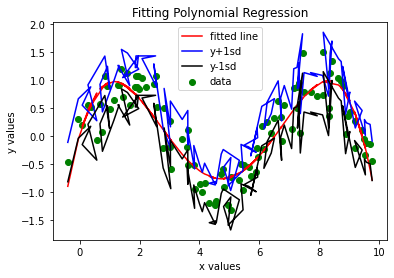

In [57]:
model.plot()

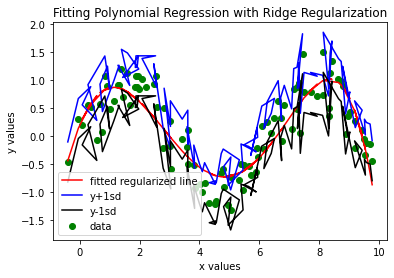

In [58]:
model.plot_ridge()